In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Inspect actions (portfolio weights)
Note: Backtest must be completed before insection of its actions can be done.

In [2]:
def make_int(x):
    try:
        if x.is_integer():
            x = int(x)
        return x
    except Exception as e:
        return x

In [3]:
def get_actions(market_name, model_base_name, gamma_trade, gamma_risk, gamma_hold, seed=0):
    return pd.read_csv(f'../experiments/{market_name}/seeded/{model_base_name}/seed_{seed}/trade_{gamma_trade}_risk_{gamma_risk}_hold_{gamma_hold}/actions.csv', index_col=0, parse_dates=True)

In [4]:
# papermill parameters
# specify which backtest to inspect
MARKET_NAME = 'DOW_30' # use either | 'DOW_30' | 'LA_40' | 'NIK_25' |
MODEL_BASE_NAME = 'RL_CNN' # use either | 'RL_CNN' | 'RL_str_fcast' | 'RL_all_inp' |
N = 10 # how many plots to make
SEED = 0 # don't change - backtests were only done for seed=0

In [5]:
# create directory to save action plots if it doesn't exist already
if not os.path.exists(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}'):
    os.makedirs(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}')

In [6]:
# see the possible gamma values to select from (these were all on the frontier for the given seed)
frontier_df = pd.read_csv(f'../experiments/{MARKET_NAME}/seeded/{MODEL_BASE_NAME}/backtests/{MARKET_NAME}_{MODEL_BASE_NAME}_seed_frontiers.csv')
frontier_df = frontier_df[frontier_df['seed']==SEED]
frontier_df = frontier_df.sort_values(by=['excess_risk', 'sharpe'], ascending=True)
frontier_df.head()

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,0.1,1000.0,0,0,-0.153457,0.426838,-0.359521,True
1,10.0,100.0,0,0,0.341938,0.457962,0.746651,True
2,1.0,100.0,0,0,0.760150,0.564093,1.347562,True
3,10.0,10.0,0,0,8.491397,7.442187,1.140981,True
4,100.0,10.0,0,0,10.158314,10.819964,0.938849,True


In [7]:
# gamma_trade_list = [make_int(i) for i in list(frontier_df['gamma_trade'].round(3))]
# gamma_risk_list = [make_int(j) for j in list(frontier_df['gamma_risk'].round(3))]
# gamma_hold_list = [make_int(k) for k in list(frontier_df['gamma_hold'].round(3))]

# GAMMA_TRIOS = list(zip(gamma_trade_list, gamma_risk_list, gamma_hold_list))
# GAMMA_TRIOS

In [8]:
# get N risk brackets
risk_min = frontier_df['excess_risk'].min()
risk_max = frontier_df['excess_risk'].max()
risk_range = risk_max - risk_min
risk_jump = risk_range/N

print(f'min={risk_min} - max={risk_max}')
print(f'jump={risk_jump}')

risk_brackets = [( risk_min+(i*risk_jump) , risk_min+((i+1)*risk_jump) ) for i in range(N)]

min=0.4268376875211937 - max=14.970801795449846
jump=1.454396410792865


In [9]:
# risk_brackets

In [10]:
frontier_df

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,0.1,1000.0,0,0,-0.153457,0.426838,-0.359521,True
1,10.0,100.0,0,0,0.341938,0.457962,0.746651,True
2,1.0,100.0,0,0,0.760150,0.564093,1.347562,True
3,10.0,10.0,0,0,8.491397,7.442187,1.140981,True
4,100.0,10.0,0,0,10.158314,10.819964,0.938849,True
5,1000.0,10.0,0,0,10.208320,14.071254,0.725473,True
6,100.0,1.0,0,0,10.760389,14.778007,0.728135,True
7,100.0,0.1,0,0,10.816760,14.970802,0.722524,True


[1/10]	bracket=(0.43, 1.88)
	no result for [2/10] index 0 is out of bounds for axis 0 with size 0
	no result for [3/10] index 0 is out of bounds for axis 0 with size 0
	no result for [4/10] index 0 is out of bounds for axis 0 with size 0
[5/10]	bracket=(6.24, 7.7)
	no result for [6/10] index 0 is out of bounds for axis 0 with size 0
	no result for [7/10] index 0 is out of bounds for axis 0 with size 0
[8/10]	bracket=(10.61, 12.06)
	no result for [9/10] index 0 is out of bounds for axis 0 with size 0
[10/10]	bracket=(13.52, 14.97)


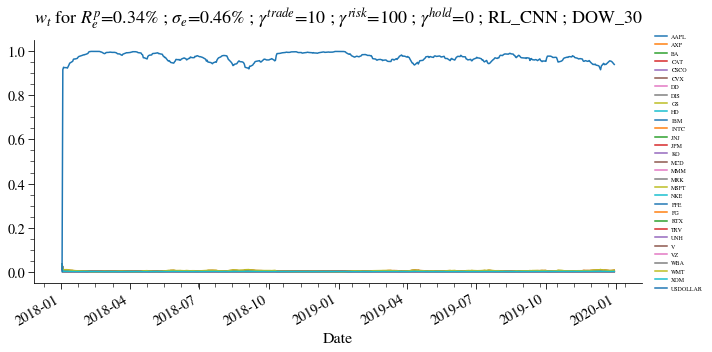

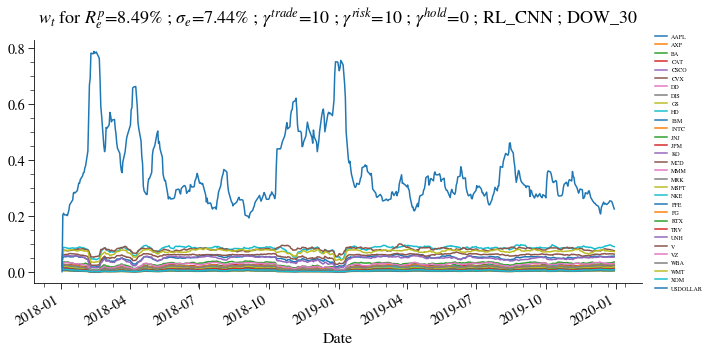

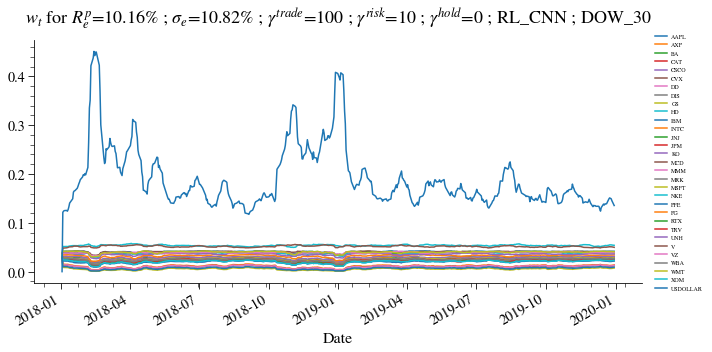

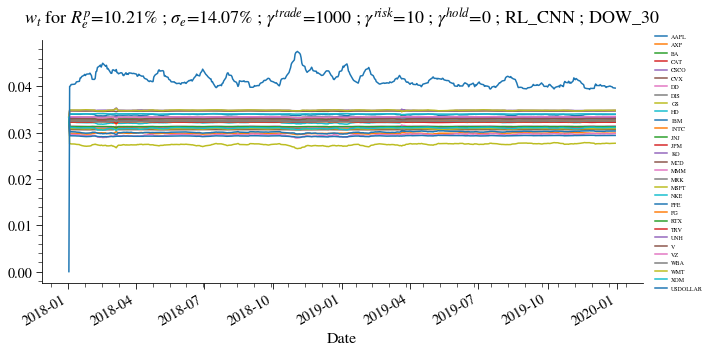

In [11]:
for n in range(N):
    try:
        #idx = (len(frontier_df)//N) * n 
        #GAMMA_TRADE, GAMMA_RISK = GAMMA_PAIRS[idx]
        #print(f'[{m+1}/{N}]\tidx={idx}\tgammas=({GAMMA_TRADE}, {GAMMA_RISK})')
        
        bracket = risk_brackets[n]
        result = frontier_df[(frontier_df['excess_risk']>bracket[0]) & \
                             (frontier_df['excess_risk']<bracket[1])].head(1)
        ret = result['excess_return'].values[0]
        risk = result['excess_risk'].values[0]
        
        GAMMA_TRADE = make_int(result['gamma_trade'].values[0])
        GAMMA_RISK = make_int(result['gamma_risk'].values[0])
        GAMMA_HOLD = make_int(result['gamma_hold'].values[0])

        rl_actions = get_actions(market_name=MARKET_NAME, 
                                 model_base_name=MODEL_BASE_NAME, 
                                 gamma_trade=GAMMA_TRADE, 
                                 gamma_risk=GAMMA_RISK, 
                                 gamma_hold=GAMMA_HOLD, 
                                 seed=SEED)

        print(f'[{n+1}/{N}]\tbracket=({round(bracket[0],2)}, {round(bracket[1],2)})')

        #result = frontier_df[(frontier_df['gamma_trade']==GAMMA_TRADE) & \
        #                  (frontier_df['gamma_risk']==GAMMA_RISK) & \
        #                  (frontier_df['seed']==SEED)]
        

        plot_title = '$w_t$ for $R^p_e$='+f'{round(ret,2)}% ; '+ \
                    '$\sigma_e$='+f'{round(risk,2)}% ; '+\
                    '$\gamma^{trade}$='+f'{GAMMA_TRADE} ; '+\
                    '$\gamma^{risk}$='+f'{GAMMA_RISK} ; '+\
                    '$\gamma^{hold}$='+f'{GAMMA_HOLD} ; '+\
                    f'{MODEL_BASE_NAME} ; {MARKET_NAME}'

        rl_actions.plot(legend=False, figsize=(10,5), title=plot_title)
        plt.legend(bbox_to_anchor=(1.11, 1.05), prop={'size': 6})
        plt.savefig(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}/{n}.png') #_risk_{GAMMA_RISK}_trade_{GAMMA_TRADE}.png')
        
    except Exception as e:
        print(f'\tno result for [{n+1}/{N}]', e)

In [12]:
rl_actions

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,USDOLLAR
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.000000
2018-01-03,0.034031,0.029838,0.033360,0.031279,0.031001,0.030648,0.029664,0.031052,0.027590,0.034059,...,0.032306,0.031325,0.032282,0.034820,0.033054,0.033436,0.032491,0.034901,0.031142,0.039986
2018-01-04,0.034003,0.029852,0.033360,0.031265,0.030984,0.030645,0.029650,0.031045,0.027599,0.034046,...,0.032300,0.031320,0.032278,0.034826,0.033040,0.033437,0.032487,0.034889,0.031128,0.040085
2018-01-05,0.033982,0.029849,0.033352,0.031254,0.030977,0.030645,0.029612,0.031033,0.027563,0.034047,...,0.032301,0.031319,0.032283,0.034825,0.033019,0.033430,0.032481,0.034877,0.031104,0.040390
2018-01-08,0.033975,0.029854,0.033355,0.031257,0.030981,0.030645,0.029617,0.031045,0.027559,0.034052,...,0.032304,0.031321,0.032288,0.034820,0.033026,0.033423,0.032478,0.034872,0.031091,0.040428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.033932,0.029876,0.033365,0.031268,0.030904,0.030639,0.029734,0.031035,0.027647,0.034011,...,0.032279,0.031312,0.032235,0.034792,0.033035,0.033451,0.032495,0.034838,0.031123,0.040065
2019-12-24,0.033919,0.029895,0.033369,0.031265,0.030911,0.030640,0.029741,0.031050,0.027676,0.034012,...,0.032280,0.031313,0.032241,0.034797,0.033038,0.033448,0.032492,0.034833,0.031113,0.039984
2019-12-26,0.033918,0.029904,0.033369,0.031264,0.030918,0.030641,0.029760,0.031051,0.027688,0.034010,...,0.032279,0.031311,0.032244,0.034804,0.033032,0.033453,0.032494,0.034833,0.031118,0.039876


In [13]:
print('done.')

done.
